## **VRP - Vehicle routing problem**

   O Vehicle routing problem (VRP) é um dos mais estudados problemas na área da otimização combinatória. Consiste no atendimento de um conjunto de consumidores por intermédio de uma frota de veículos, que partem de um ou mais pontos denominados depósitos.  O principal objetivo é minimizar os custo de transporte das mercadorias para os consumidores. 
Este problema apresenta uma quantidade enorme de variações, baseadas na carga dos veiculos, janela de tempo, demanda dos clientes,dentre outras.

   O VRP, apesar do seu enunciado relativamente simples, apresenta elevada complexidade computacional, devido a quantidade de combinações geradas conforme se aumenta a quantidade valores e variaveis envolvidas pelo que é interessante como problema no teste de diversas heurísticas.

Esta implementação é um algoritmo de força bruta que calcula todas as combições possiveis de rotas com os seu respectivo custo, de forma identifica a rota de menor custos. Basicamente forma observadas as seguinte premissas:

1.   Todos as entregas partem de apenas um deposito;
2.   Apenas dois veiculos envolvidos;
3.   Todos os veiculo partem do deposito e devem concluir a rota no mesmo;
4.   Cada cliente só pode ser visitado uma vez;
5.   Todos os clientes devem ser visitados;
6.   Todos os veiculo devem sair para realizar entregas.

Esta implementação busca implementar o VRP Classico, de forma que não estão implementadas restrição que geram variações do modelo. Restrições como capacidade dos veiculos, demanda dos clientes, limites de tempo e precedência de atendimento dos clientes, não estão sendo consideradas.

Segue a Função Objetivo:

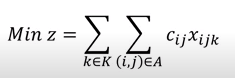

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import time
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Cria semente para numeros randomicos
rnd = np.random
rnd.seed(0)

In [ ]:
#Parametro que define a quantidade de clientes
quantidade_clientes =  7 # numero de clientes

In [ ]:
# Define o ponto dos clientes com base na quantidade - O deposito será acrescentado posteriormente, e será convencionado como ponto 1
Clientes = [i for i in range(2, quantidade_clientes + 2)]
Clientes

In [ ]:
# Define todos os pontos do modelo, acrescentado o deposito como primeiro ponto
Pontos = [1] + Clientes
Pontos

In [ ]:
# Traça todos os arcos possiveis para representar os caminhos possiveis entre dois pontos distintos
Caminhos = [(i,j) for i in Pontos for j in Pontos if i!=j]
print('Quantidade: ' + str(len(Caminhos)))
Caminhos

In [ ]:
# Definindo os veículos do modelo
Veiculos = [1,2]
Veiculos

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/DADOS_VRP/DATASET/VRP_TRECHO_TESTE1.csv',delimiter=";")
dataset

In [ ]:
# Inicio da medição do tempo de CPU utilizado
inicio  = time.time()

In [ ]:
# Definindo todas a rotas possiveis
# retorna todas a permutacoes de rotas possiveis partindo do primeiro elemento que é o deposito
# Acrescentamos o deposito no final para ajudar no calculo do retorno (Ex. pegar o valor de (4,1))
# Neste momento já montamos as rotas atendendo a premissa que a mesma rota não passa no mesmo cliente duas vezes
# Também evitamos a criação de subrotas
def todas_rotas(seq, quantidade):
  #permuta todas a opcoes com base na quantidade de destinos desejados. Fixamos o primeiro item como deposito de chegada e saida
  return [[seq[0]] + list(rest) + [seq[0]] for rest in itertools.permutations(seq[1:],quantidade)]
contador = 1
Rotas = []
#repito as permutacoes aumentando a quantidade de itens envolvidos
while (contador < len(Pontos)):
  Rotas = Rotas + todas_rotas(Pontos,contador) 
  contador   = contador + 1
print('Quantidade: ' + str(len(Rotas)))
Rotas

In [ ]:
# Calculando o custo de cada rota
# Recuperamos cada rota. De cada rota recuperamos o custo de cada trecho, somamos os trechos
# de forma a encontrar o custo total da rota
# o resultado vai para um dicionario que tem a rota e a somatoria dos trechos.

def custo_da_rota(rota):
    resultado = 0
    print(rota)
    for i in range(0,len(rota)-1):
      teste = dataset.loc[dataset['trechos'] == str((rota[i], rota[i+1]))].to_dict('index')
      resultado=resultado+ list(teste.values())[0].get('custo')
    return resultado

lista_custos={}
i=0
for rota in Rotas:
    curso_rota = custo_da_rota(rota)
    lista_custos[i]=(rota,curso_rota)
    i = i +1 
print('Quantidade: ' + str(len(lista_custos)))
 
lista_custos

In [ ]:
# Filtragem da premissa que um cliente não pode ser atendido mais de uma vez
def verificaSeClienteAtendidoApenasUmaVez(rota_para_restricao):
  inclui_rota = True
  lista_rotas_temp = rota_para_restricao[0][0]+rota_para_restricao[1][0]
  for cliente in Clientes:
    if(lista_rotas_temp.count(cliente)>1):
        inclui_rota = False
        break;
  return inclui_rota


In [ ]:
# Filtragem da premissa que todos os clientes devem ser atendidos
def verificaSeTodosOsPontosAtendidos(rota_para_restricao):
  inclui_rota = True
  lista_rotas_temp = rota_para_restricao[0][0]+rota_para_restricao[1][0]
  for cliente in Clientes:
    if(lista_rotas_temp.count(cliente)==0):
        inclui_rota = False
        break;
  return inclui_rota

In [ ]:
# Cruza todas as rotas possiveis para os dois veiculos
# Convencionamos que a primeira rota para veiculo 1 e a segunda para o veiculo 2
# aplicando verificas para futuramente calcular apenas as rotas que nao desobedecem 
# alguma das premissas: Cliente atendido apenas uma vez e todos os clientes atendidos
lista_rotas_combinada={}
i=0
for rota_combinada in itertools.combinations(lista_custos.values(),2):
  if(verificaSeClienteAtendidoApenasUmaVez(rota_combinada) and verificaSeTodosOsPontosAtendidos(rota_combinada)):
    lista_rotas_combinada[i] = rota_combinada
  i = i+1
print('Quantidade: ' + str(len(lista_rotas_combinada)))
lista_rotas_combinada

In [ ]:
#Calcula o custo total da combinação das duas rotas
# é somado o custo de cada rota e armazenado o valor total
lista_rotas_combinada_custo={}
i=0
for rota_para_calculo in lista_rotas_combinada.values():
  lista_rotas_combinada_custo[i]= (rota_para_calculo,rota_para_calculo[0][1]+rota_para_calculo[1][1])
  i = i+1
print('Quantidade: ' + str(len(lista_rotas_combinada_custo)))
lista_rotas_combinada_custo

In [ ]:
def registrar_log_execucao():
  conteudo = ''
  with open('/content/drive/MyDrive/DADOS_VRP/LOG_EXECUCAO/Forca-bruta-log.txt','r') as arq:
      conteudo = arq.read() 
  with open('/content/drive/MyDrive/DADOS_VRP/LOG_EXECUCAO/Forca-bruta-log.txt', 'a') as testwritefile:
      testwritefile.write('\n --------Inicio: ' + time.strftime('%d/%m/%Y %H:%M:%S') + '--------')
      testwritefile.write('\n INICIO='+str(inicio)+'; FIM='+ str(fim)+'; TOTAL='+str(fim-inicio)) 
      testwritefile.write('\n Solucao:' + str(lista_rotas_calculo_menor_custo) )   
      testwritefile.write('\n --------Fim: ' + time.strftime('%d/%m/%Y %H:%M:%S') + '--------')

In [ ]:
#Identificar combinação de rotas de menor custo
#Verifica cada rota buscando separar a de menor custo
i=0
lista_rotas_calculo_menor_custo={}
valor_menor_custo= 0
for rota_para_restricao in lista_rotas_combinada_custo.items():
  #print(type(rota_para_restricao));
  if not valor_menor_custo:
    valor_menor_custo = rota_para_restricao[1][1]
  elif rota_para_restricao[1][1] < valor_menor_custo:
    valor_menor_custo = rota_para_restricao[1][1]
indice_novo = 1
for rota_para_restricao in lista_rotas_combinada_custo.items():
  if rota_para_restricao[1][1] == valor_menor_custo:
    lista_rotas_calculo_menor_custo[indice_novo]= rota_para_restricao
  indice_novo = indice_novo+1
print('Quantidade: ' + str(len(lista_rotas_calculo_menor_custo)))
print(lista_rotas_calculo_menor_custo)
#return lista_rotas_calculo_menor_custo
fim  = time.time()
registrar_log_execucao()